In [1]:
cd ~/BC-actionpred-seg/

/mmfs1/data/aglinska/BC-actionpred-seg


In [2]:
#https://learnopencv.com/ultralytics-yolov8/#Models-Available-in-YOLOv8

In [3]:
from ultralytics import YOLO

/data/aglinska/anaconda3/envs/yolo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter
import os

/scratch/aglinska/ipykernel_30195/1969985733.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [5]:
import skvideo
import skvideo.io
def load_video(fn):
    videodata = skvideo.io.vread(fn)
    return videodata

In [6]:
indir = './Data/haa500_v1_1/video'
folders = os.listdir(indir) ; folders.sort()

videos = []
for folder in folders:
    cont = [file for file in os.listdir(os.path.join(indir,folder)) if file.endswith('.mp4')]
    videos.append(cont)
    
print(len(folders))
print(np.array([len(folder) for folder in videos]))

500
[20 21 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20

In [74]:
model = YOLO("yolov8x-seg.pt")  # load a pretrained model (recommended for training)

'./Data/haa500_v1_1/video/ALS_IceBucket_Challenge/ALS_IceBucket_Challenge_010.mp4'

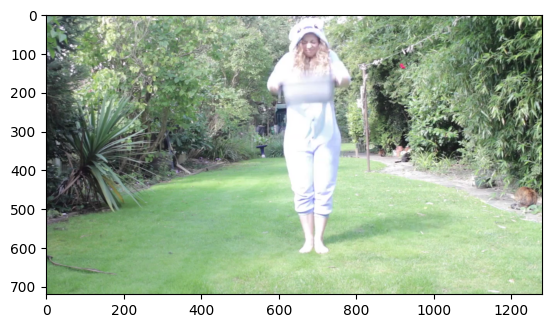

In [60]:
f = 0
v = 6
fn = os.path.join(indir,folders[f],videos[f][v])
video_data = load_video(fn)
frame = 0
im = video_data[frame,:,:,:]
plt.imshow(im)
fn

In [11]:
#model.predict(im)

In [16]:
#results = model('axe_throwing_000.mp4')

In [73]:
results = model.predict("https://ultralytics.com/images/bus.jpg")
results

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 82.0MB/s]

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
Ultralytics YOLOv8.0.6 🚀 Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /mmfs1/data/aglinska/BC-actionpred-seg/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 38.7ms
Speed: 0.3ms pre-process, 38.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [69]:
res = model.predict('./Data/haa500_v1_1/video/',save=True, save_txt=True)
res

Ultralytics YOLOv8.0.6 🚀 Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)
Fusing layers... 
YOLOv8x-seg summary: 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs


AssertionError: No images or videos found in /mmfs1/data/aglinska/BC-actionpred-seg/Data/haa500_v1_1/video. Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp', 'pfm')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')

In [68]:
model('./Data/haa500_v1_1/video/',save=True, save_txt=True)

Ultralytics YOLOv8.0.6 🚀 Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)
Fusing layers... 
YOLOv8x-seg summary: 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs


AssertionError: No images or videos found in /mmfs1/data/aglinska/BC-actionpred-seg/Data/haa500_v1_1/video. Supported formats are:
images: ('bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp', 'pfm')
videos: ('asf', 'avi', 'gif', 'm4v', 'mkv', 'mov', 'mp4', 'mpeg', 'mpg', 'ts', 'wmv')

In [82]:
im = plt.imread('bus.jpg')
arr = np.load('arr.npy', allow_pickle=True)
arr.shape

(8, 640, 480)

In [88]:
box = np.load('box.npy', allow_pickle=True)
box.shape

(8, 6)

In [89]:
box

array([[          5,         231,         802,         738,     0.95184,           5],
       [         51,         399,         245,         904,     0.93367,           0],
       [        669,         395,         810,         881,     0.91947,           0],
       [        223,         406,         344,         860,     0.90824,           0],
       [          0,         550,          79,         868,     0.64936,           0],
       [          0,         549,          79,        1066,     0.52189,           0],
       [        137,         476,         148,         506,      0.3289,          27],
       [        667,          17,         741,          90,     0.27859,           1]], dtype=float32)

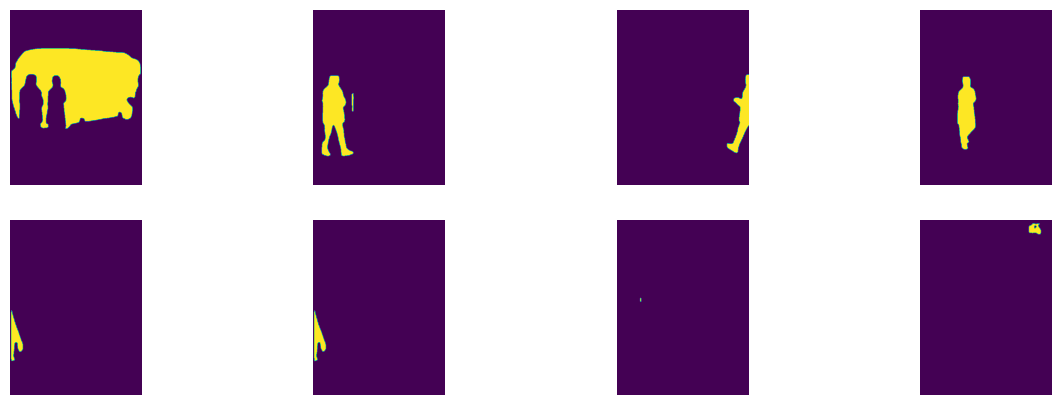

In [97]:
plt.figure(figsize=(15,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(arr[i,:,:])
    plt.axis('off')    

In [132]:
files = [file for file in os.listdir() if file.endswith('_masks.npy')]
files.sort()

In [133]:
files

['axe_throwing_000_000_masks.npy',
 'axe_throwing_000_001_masks.npy',
 'axe_throwing_000_002_masks.npy',
 'axe_throwing_000_003_masks.npy',
 'axe_throwing_000_004_masks.npy',
 'axe_throwing_000_005_masks.npy',
 'axe_throwing_000_006_masks.npy',
 'axe_throwing_000_007_masks.npy',
 'axe_throwing_000_008_masks.npy',
 'axe_throwing_000_009_masks.npy',
 'axe_throwing_000_010_masks.npy',
 'axe_throwing_000_011_masks.npy',
 'axe_throwing_000_012_masks.npy',
 'axe_throwing_000_013_masks.npy',
 'axe_throwing_000_014_masks.npy',
 'axe_throwing_000_015_masks.npy',
 'axe_throwing_000_016_masks.npy',
 'axe_throwing_000_017_masks.npy']

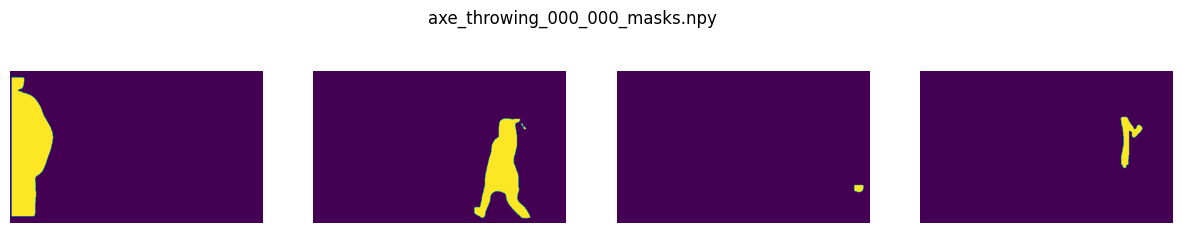

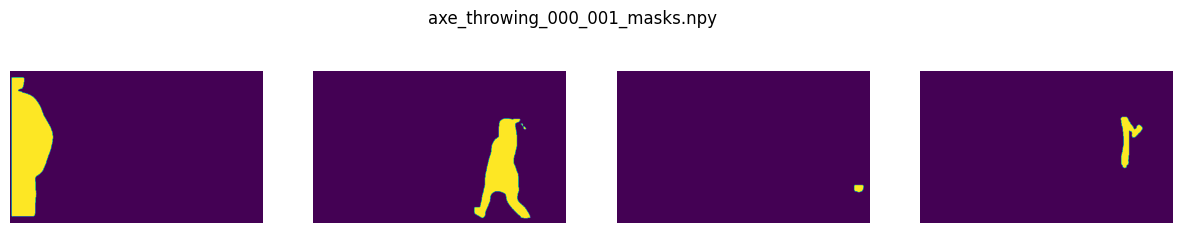

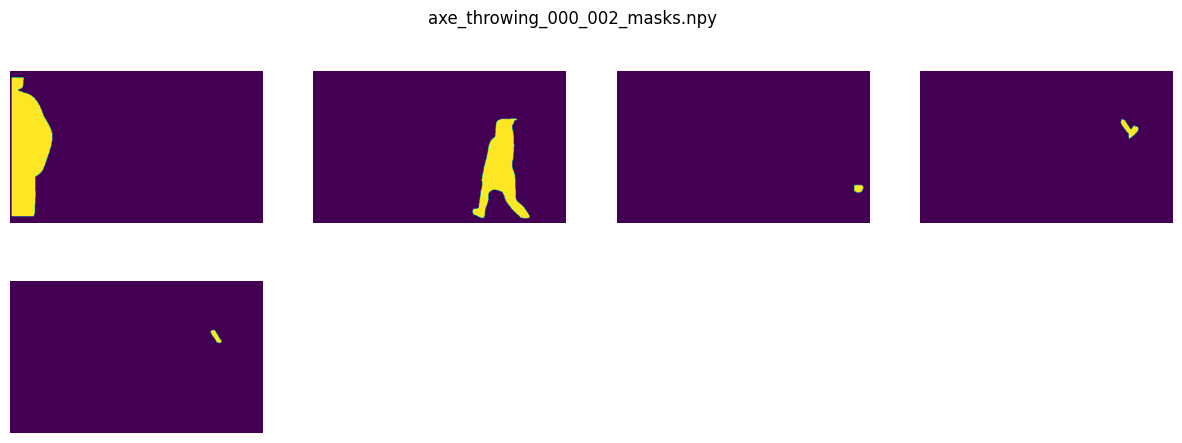

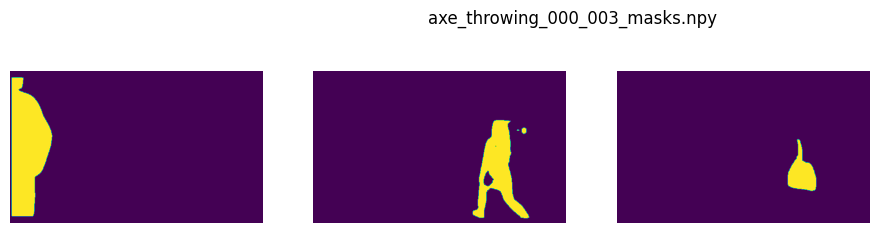

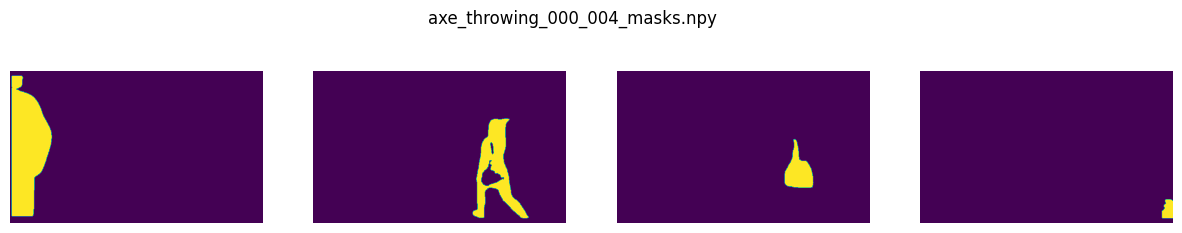

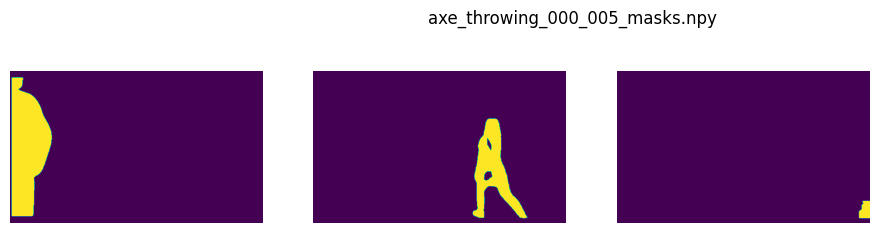

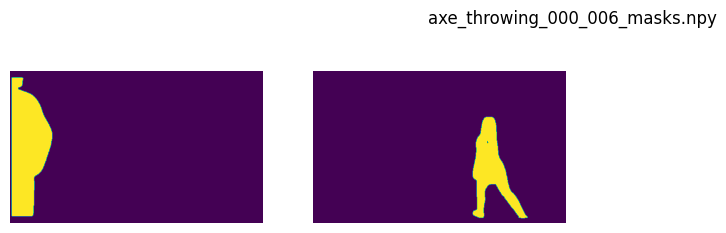

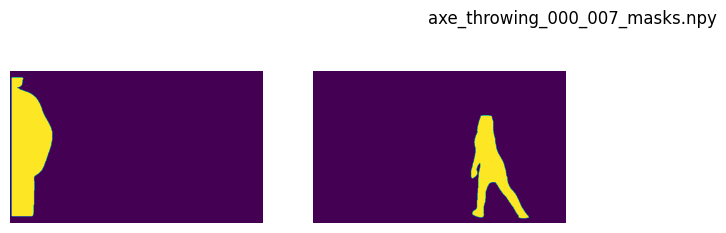

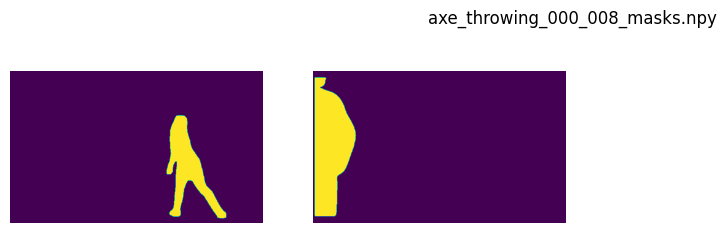

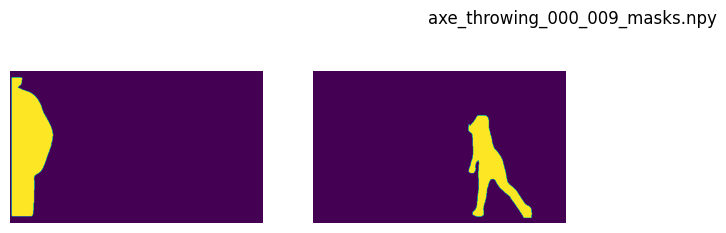

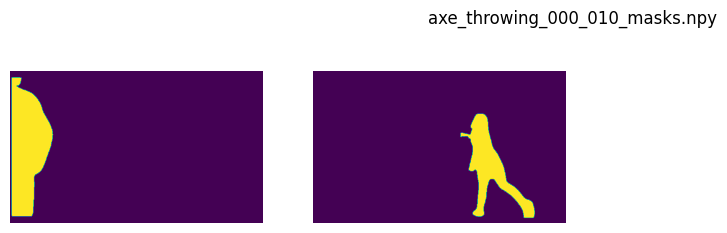

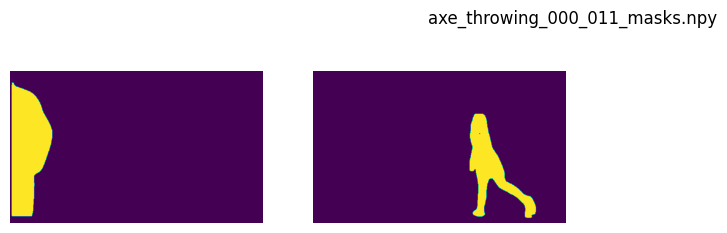

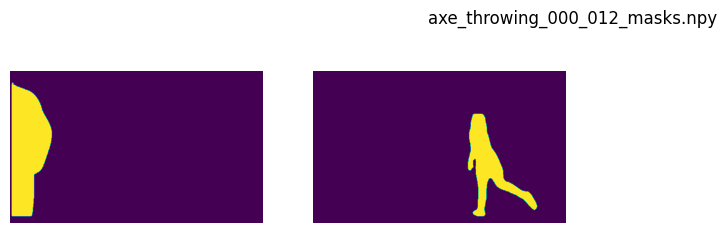

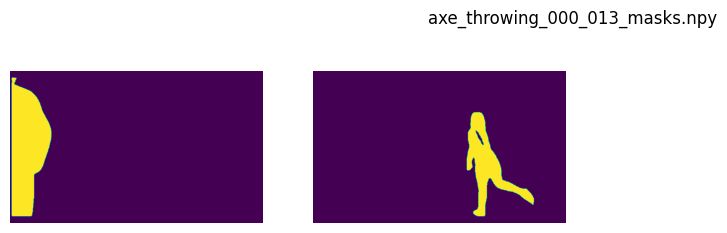

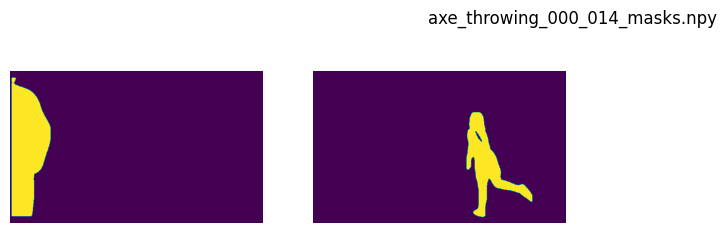

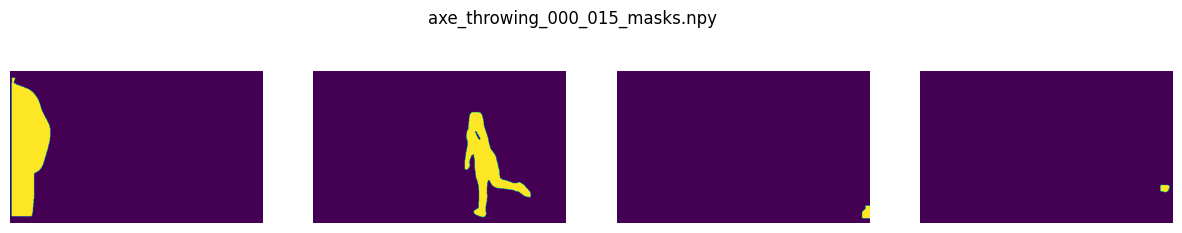

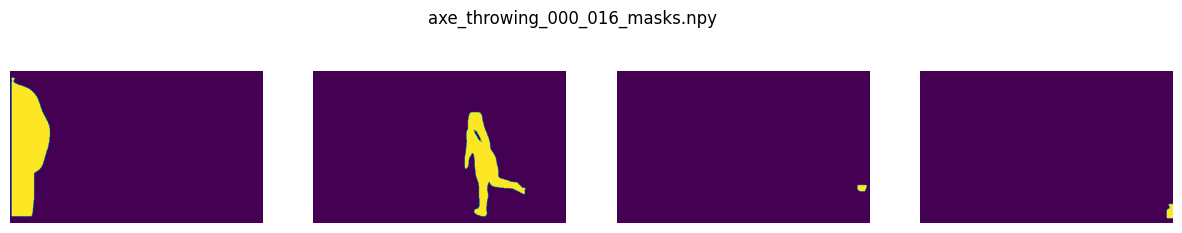

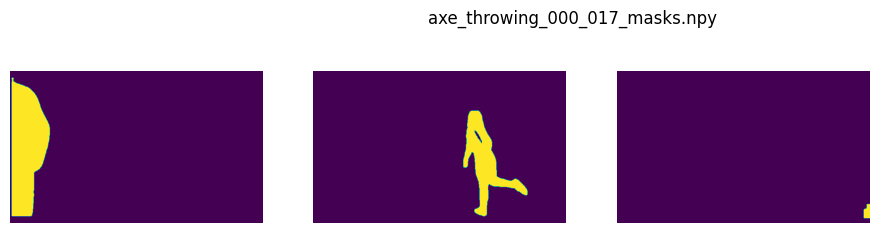

In [134]:
for file in files:
    arr = np.load(file)
    plt.figure(figsize=(15,5))
    for i in range(arr.shape[0]):
        plt.subplot(2,4,i+1)
        plt.imshow(arr[i,:,:])
        plt.axis('off') 
    plt.suptitle(file)